In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()    

Read dataset

(400, 4096)


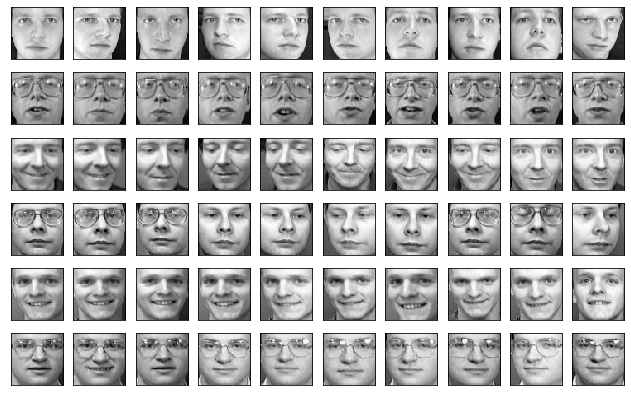

In [98]:
df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\face_data.csv.txt")
targets=df["target"]
pixels=df.drop(["target"],axis=1)
print(np.array(pixels).shape)
show_orignal_images(pixels)

Split dataset into training and testing

In [99]:
x_train,x_test,y_train,y_test=train_test_split(pixels,targets)

PERFORMING PCA

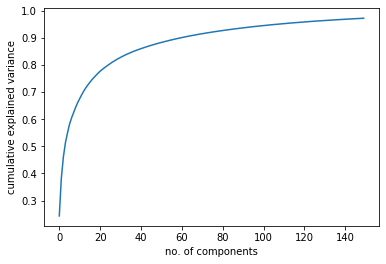

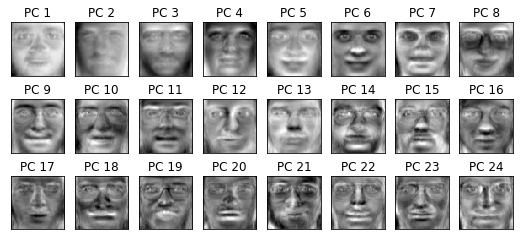

In [100]:
pca=PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()
show_eigenfaces(pca)

PROJECT TRAINING DATA TO PCA

In [101]:
print("Projecting the input data on the eigenfaces orthonormal basic")
Xtrain_pca=pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basic


INITIALIZE CLASSIFIER AND FIT TRAINING DATA

In [102]:
clf=SVC(kernel='rbf',C=1000,gamma=0.001)
clf=clf.fit(Xtrain_pca,y_train)

PERFORM TESTING AND GET CLASSIFICATION REPORT

In [103]:
print("Predicting people's names on the test set")
t0=time()
Xtest_pca=pca.transform(x_test)
y_pred=clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.016s
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00 